# Visão Computacional - Lista de Exercícios 1
Alunos:
- Luana Júlia Nunes Ferreira
- Lucas Mendes Massa

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Questão 1
A abordagem usada consiste em calcular a diferença absoluta entre as duas imagens transferidas para escala de cinza e encontrar uma máscara binária a partir dessa diferença para extrair o foreground 

In [2]:
img1 = cv2.imread('./first_frame.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

In [3]:
img2 = cv2.imread('./second_frame.jpg')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [4]:
img1.shape

(312, 500, 3)

In [5]:
img2_reshaped = cv2.resize(img2,(500,312))

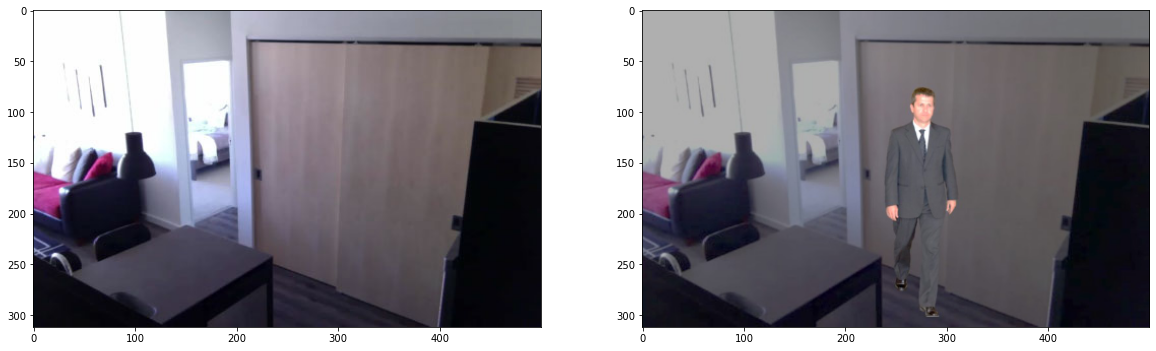

In [620]:
f, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(img1,cmap='gray')
axarr[1].imshow(img2_reshaped,cmap='gray')

In [679]:
# gerando imagens em escala de cinza
img1_gray = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2_reshaped,cv2.COLOR_RGB2GRAY)

# adicionando blur
kernel1 = np.ones((11,11),np.float32)/50
img1_gray = cv2.filter2D(img1_gray,-1,kernel1)

m1 = img1_gray.max()
m2 = img2_gray.max()

img1_gray = img1_gray/m1
img2_gray = img2_gray/m2

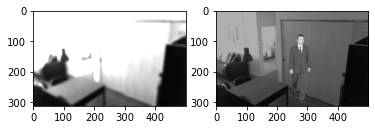

In [680]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1_gray,cmap='gray')
axarr[1].imshow(img2_gray,cmap='gray')

In [692]:
diff_img = cv2.absdiff(img1_gray,img2_gray)

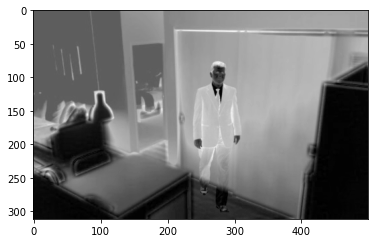

In [693]:
plt.imshow(diff_img, cmap='gray')

In [694]:
# obtendo uma mascara binaria para o foreground
threshold = 0.62
mask = np.zeros(312*500).reshape((312,500))

for i in range(diff_img.shape[0]):
    for j in range(diff_img.shape[1]):
        if diff_img[i,j]>=threshold:
            mask[i,j] = 1

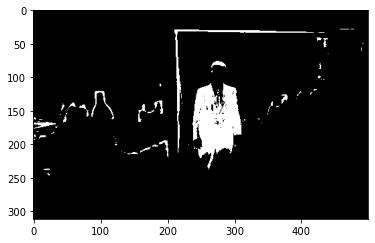

In [695]:
plt.imshow(mask,cmap='gray')

In [696]:
fore = np.zeros(3*312*500).reshape((312,500,3)).astype(int)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] == 1:
            fore[i,j,:] = img2_reshaped[i,j,:]
            
kernel2 = np.ones((11,11),np.float32)/100
blured2 = cv2.filter2D(img2_reshaped,-1,kernel2)
            
res = np.zeros(3*312*500).reshape((312,500,3)).astype(int)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i,j] == 1:
            res[i,j,:] = fore[i,j,:]
        else:
            res[i,j,:] = blured2[i,j,:]

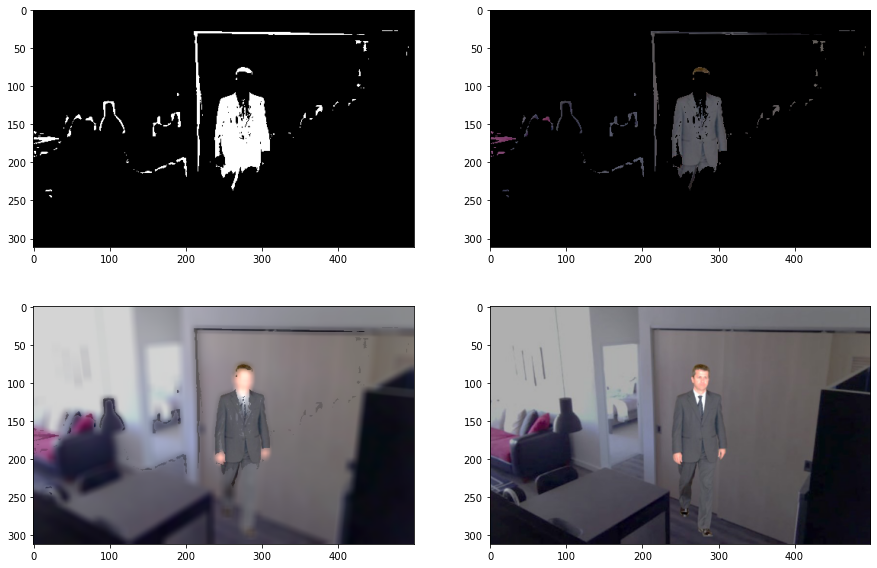

In [697]:
# plotando, respectivamente, a mascara binaria, o foreground obtido,
# a composição de foreground com a imagem 2 e a imagem 2 original. 
f, axarr = plt.subplots(2,2,figsize=(15,10))
axarr[0,0].imshow(mask,cmap='gray')
axarr[0,1].imshow(fore,cmap='gray')
axarr[1,0].imshow(res,cmap='gray')
axarr[1,1].imshow(img2_reshaped,cmap='gray')

# Questão 2

# Questão 3

In [804]:
# funcao para aplicar filtro em imagem RGB
def aplicarFiltro(image,kernel):
    r = kernel.shape[0]
    c = kernel.shape[1]
    h = image.shape[0]
    w = image.shape[1]
    
    if r != c:        
        print('Erro: O kernel passado não é uma matriz quadrada')
        return None
    
    if (r%2==0):
        print('Erro: O kernel passado possui número par de linhas e colunas')
        
    k = int((r-1)/2)
    
    channel0 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):
            pixel = 0
            a = 0
            for u in range(-(k-1),k+1,1):
                b = 0
                for v in range(-(k-1),k+1,1):
                    pixel += image[(x-u),(y-v),0]*kernel[a,b]
                    b+=1
                a+=1
            new_row.append(pixel)
        channel0.append(new_row)
        
    channel1 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):            
            pixel = 0
            a = 0
            for u in range(-(k-1),k+1,1):
                b = 0
                for v in range(-(k-1),k+1,1):
                    pixel += image[(x-u),(y-v),1]*kernel[a,b]
                    b+=1
                a+=1
            new_row.append(pixel)
        channel1.append(new_row)
        
    channel2 = []
    
    for x in range(k,image.shape[0]-k):
        new_row = []       
        for y in range(k,image.shape[1]-k):            
            pixel = 0
            a = 0
            for u in range(-(k-1),k+1,1):
                b = 0
                for v in range(-(k-1),k+1,1):
                    pixel += image[(x-u),(y-v),2]*kernel[a,b]
                    b+=1
                a+=1
            new_row.append(pixel)
        channel2.append(new_row)
        
    channel0 = np.array(channel0)
    channel1 = np.array(channel1)
    channel2 = np.array(channel2)
        
    result = np.zeros(3*channel0.shape[0]*channel0.shape[1]).reshape((channel0.shape[0],channel0.shape[1],3))
    result[:,:,0] = channel0
    result[:,:,1] = channel1
    result[:,:,2] = channel2
    
    return result

In [811]:
# filtro a ser aplicado
filtro = np.array([
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1]
]).astype(float)
filtro *= 1/15

In [812]:
small_img1 = cv2.resize(img1,(200,100))
filtered = aplicarFiltro(small_img1,filtro)

In [813]:
filtered.shape

(96, 196, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


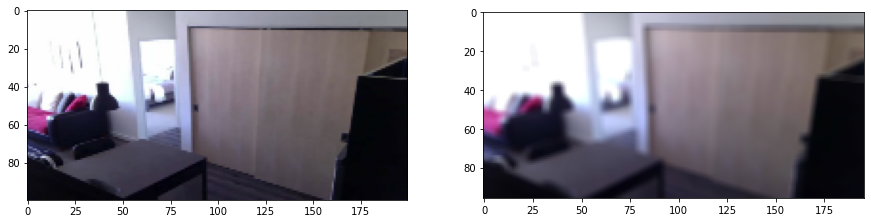

In [814]:
# imagem original e resultado da convolução, respectivamente
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(small_img1)
axarr[1].imshow(filtered/255)